# Walmart

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from tabulate import tabulate

In [3]:
#reading the data
waldf = pd.read_csv('Walmart.csv')

In [4]:
waldf

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
waldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#converting the Date , object type to datetime
waldf['Date']=pd.to_datetime(waldf['Date'], format='mixed')


In [7]:
#getting week, momth and year from the date col.
waldf['week'] =waldf['Date'].dt.isocalendar().week
waldf['month'] =waldf['Date'].dt.month 
waldf['year'] =waldf['Date'].dt.year

In [8]:
waldf

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,19,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,50,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,10,2012


In [9]:
#after extracting the data , dropping the date column
waldf.drop('Date',axis=1,inplace=True)

In [10]:
waldf

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,18,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,39,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,19,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,50,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,42,10,2012


In [11]:
#creating a copy
wal2=waldf.copy()

In [12]:
#checking for null values
waldf.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
week            0
month           0
year            0
dtype: int64

In [13]:
#checking for duplicates
waldf.duplicated().sum()

0

In [14]:
waldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   week          6435 non-null   UInt32 
 8   month         6435 non-null   int32  
 9   year          6435 non-null   int32  
dtypes: UInt32(1), float64(5), int32(2), int64(2)
memory usage: 433.7 KB


In [15]:
#statictical description 
wal2.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,26.0,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,14.511794,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,14.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,26.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,38.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,52.0,12.000000,2012.000000


In [16]:
#chaning the categorical col. to numerical
waldf['Holiday_Flag'] = waldf['Holiday_Flag'].astype('category')

In [17]:
def data_types(df):
    cat_var =[] # creating an empty list for categorial values
    con_var =[] # creating an empty list for continous values
    
    for col in df:
        if df[col].nunique()<50:
            cat_var.append(col)
        else:
            con_var.append(col)
    return cat_var, con_var   

In [18]:
# the data_type fuction , divides the columns or features of the database between categorical and numerical columns.

In [19]:
categorial_var, continous_var = data_types(wal2)
print(tabulate({"cat_var":categorial_var,"con_var":continous_var},headers=["Categorial Vari","Continous Vari"]))

Categorial Vari    Continous Vari
-----------------  ----------------
Store              Weekly_Sales
Holiday_Flag       Temperature
month              Fuel_Price
year               CPI
                   Unemployment
                   week


In [20]:
def hist_box(*s):
    for col in s:
        fig,ax=plt.subplots(1,2,figsize=(15,4))
        ax=ax.ravel()
        sns.histplot(x=col,bins=10,ax=ax[0],data=waldf)
        ax[0].set_title(f"distribution of {col} using histogram")
        ax[0].set_xlabel(f"{col}")
        ax[0].set_ylabel(f"frequency of {col}")
        
        
        sns.boxplot(y=waldf[col],ax=ax[1])
        ax[1].set_title(f"distribution using boxplot of {col}")

In [23]:
# the above hist_box function, plots an histogram and a boxplot , which shows the frequency distribution of the specific colum or feature when the hist_box func. is called  . 

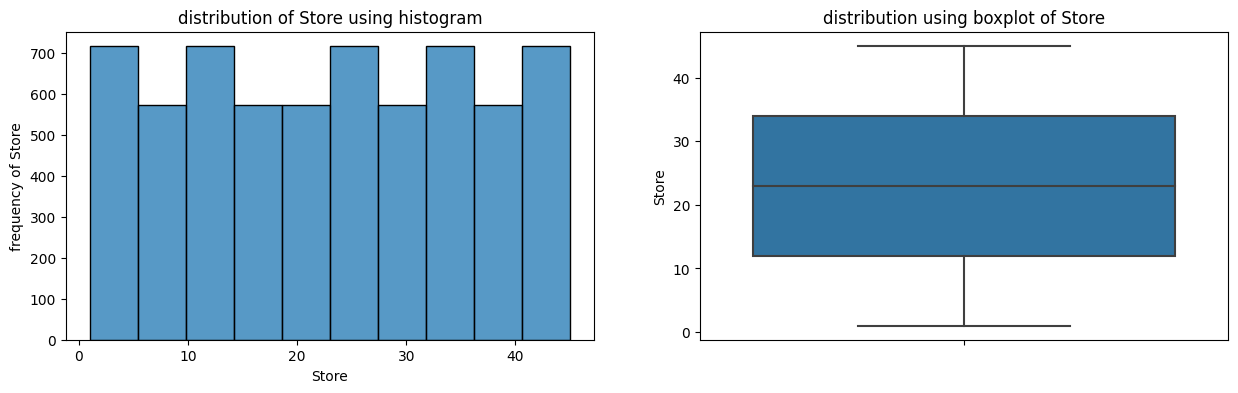

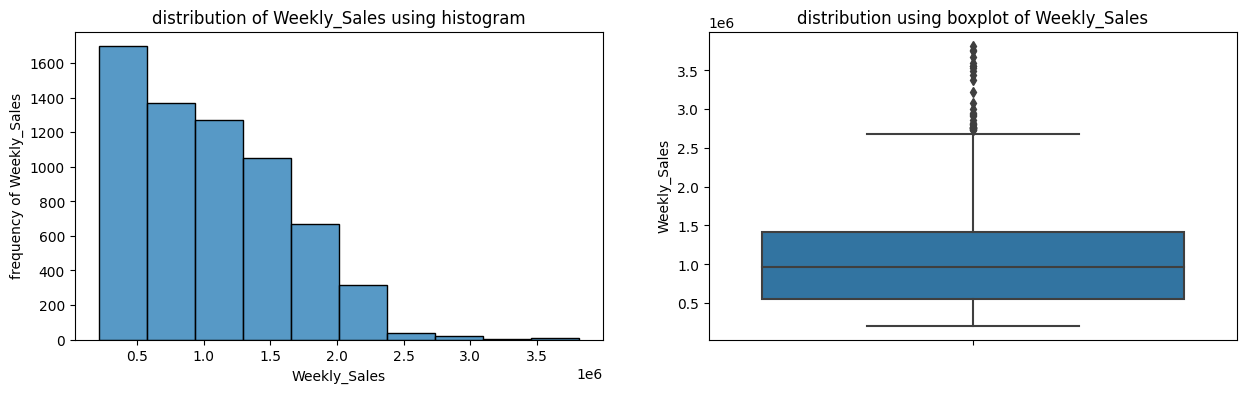

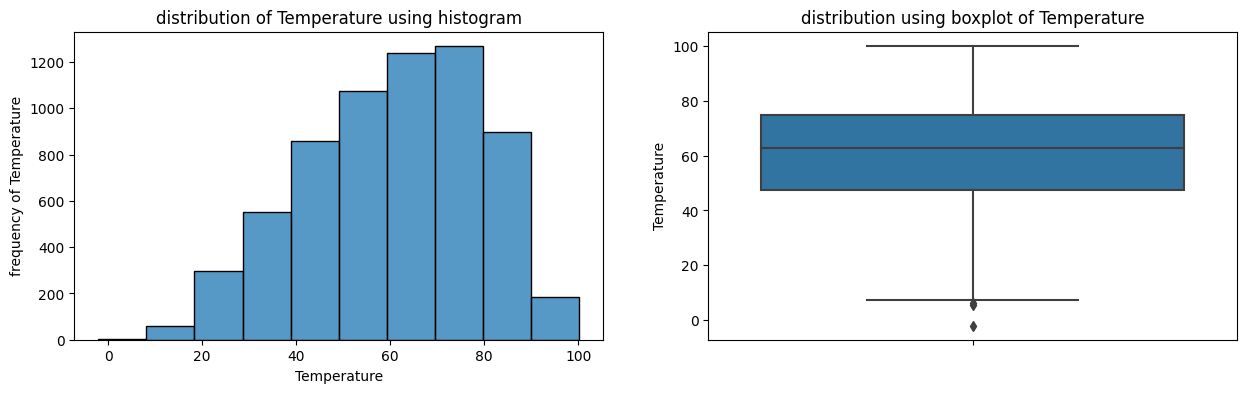

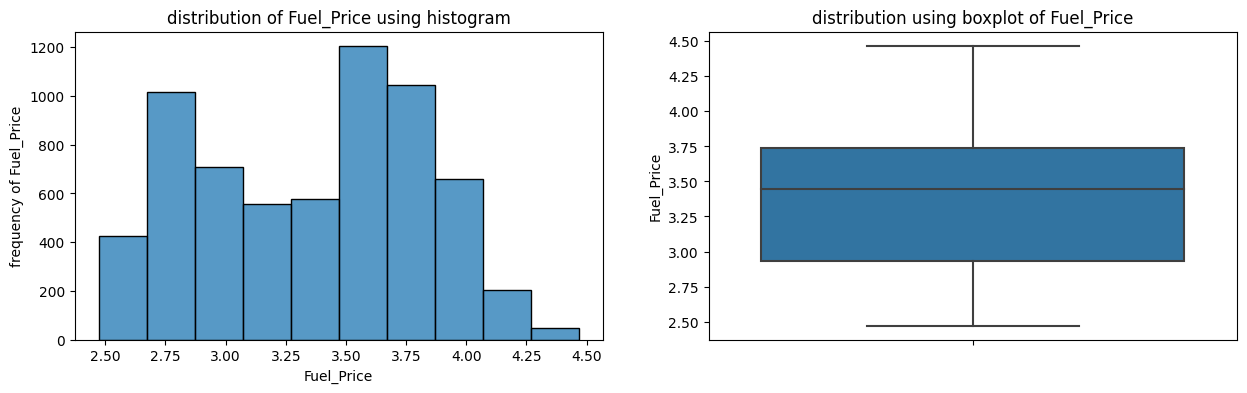

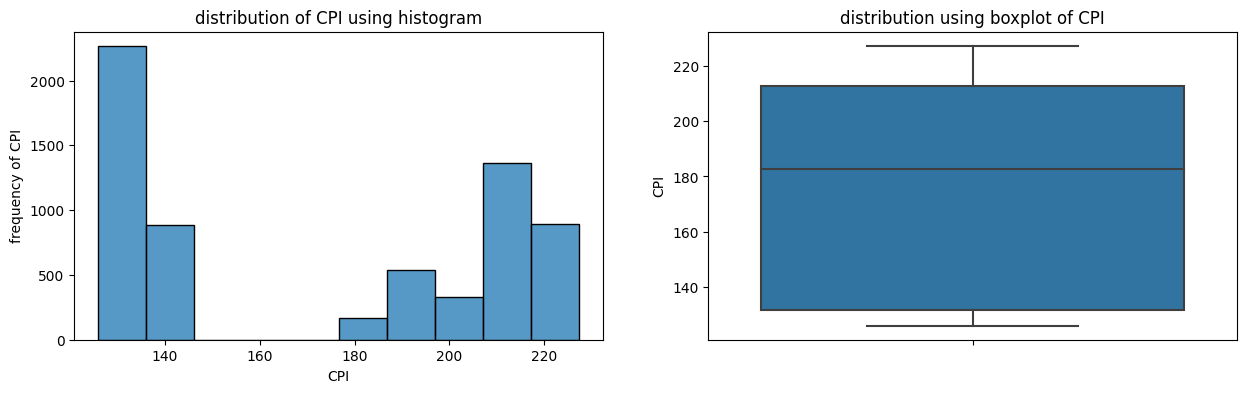

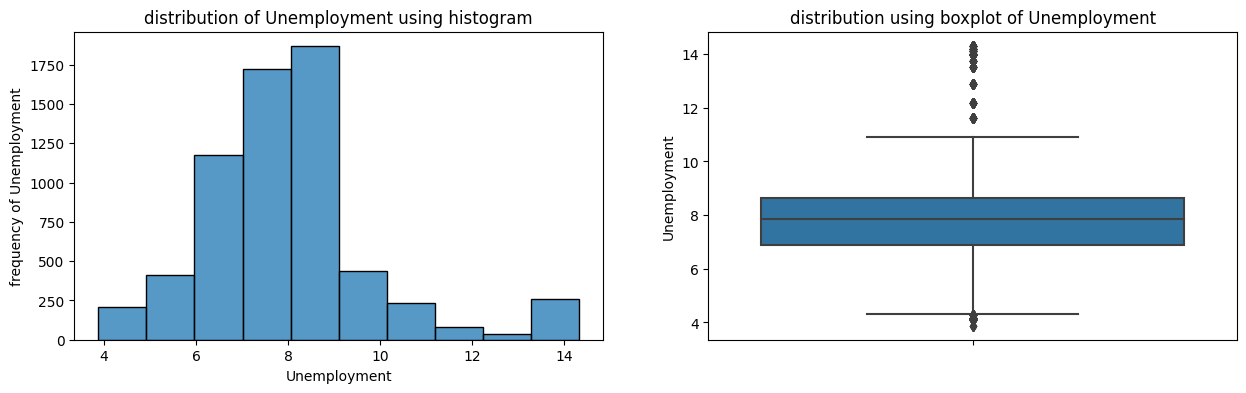

In [24]:
hist_box('Store','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment')

In [21]:
#treating the outliers with tyhe IQR method 
q1 = waldf["Weekly_Sales"].quantile(.25)
q3 = waldf["Weekly_Sales"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
waldf.loc[waldf["Weekly_Sales"]>uf,"Weekly_Sales"]=waldf["Weekly_Sales"].median()
waldf.loc[waldf["Weekly_Sales"]<lf,"Weekly_Sales"]=waldf["Weekly_Sales"].median()

In [22]:
q1 = waldf["Temperature"].quantile(.25)
q3 = waldf["Temperature"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
waldf.loc[waldf["Temperature"]>uf,"Temperature"]=waldf["Temperature"].median()
waldf.loc[waldf["Temperature"]<lf,"Temperature"]=waldf["Temperature"].median()

In [23]:
q1 = waldf["Unemployment"].quantile(.25)
q3 = waldf["Unemployment"].quantile(.75)
iqr = q3-q1
lf = q1-1.5*iqr
uf = q3+1.5*iqr
waldf.loc[waldf["Unemployment"]>uf,"Unemployment"]=waldf["Unemployment"].mode()[0]
waldf.loc[waldf["Unemployment"]<lf,"Unemployment"]=waldf["Unemployment"].mode()[0]

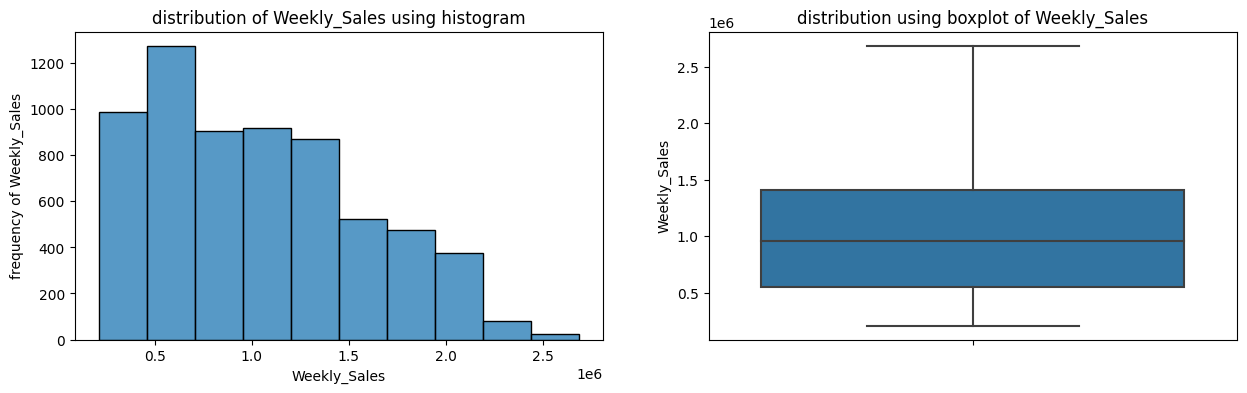

In [24]:
hist_box('Weekly_Sales')

Text(0.5, 1.0, 'Sales wise unemployment')

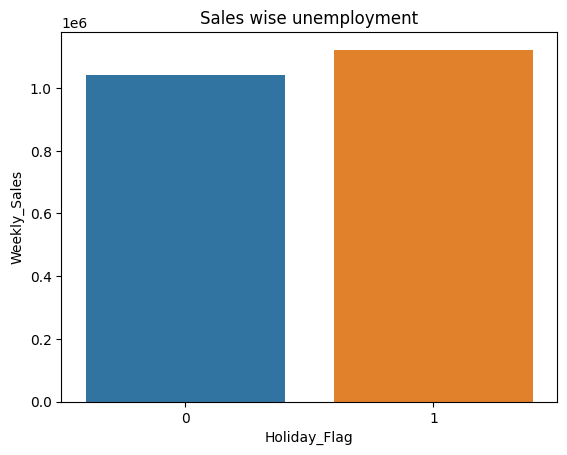

In [29]:
#plotting
sns.barplot(y='Weekly_Sales',x='Holiday_Flag',data=wal2,ci=None)
plt.title('Sales wise unemployment')

In [ ]:
#weekly sales high during holidays

Text(0.5, 1.0, 'Month wise Sales')

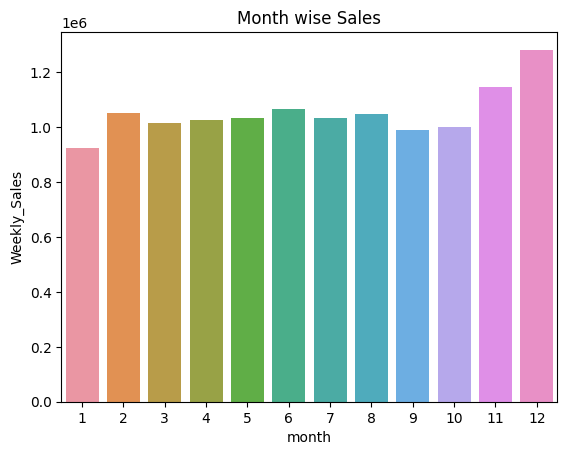

In [103]:
sns.barplot(y='Weekly_Sales',x='month',data=wal2,ci=None)
plt.title('Month wise Sales')

In [1]:
# weekly sales high in November and december

Text(0.5, 1.0, 'Year wise Sales')

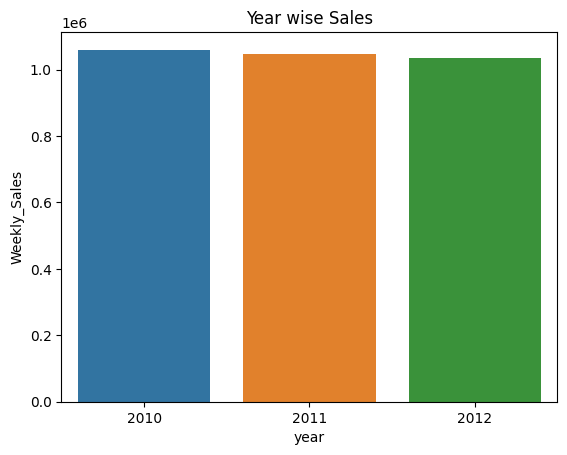

In [104]:
sns.barplot(y='Weekly_Sales',x='year',data=wal2,ci=None)
plt.title('Year wise Sales')

In [ ]:
# weekly sales of three years

Text(0.5, 1.0, 'Store wise Sales')

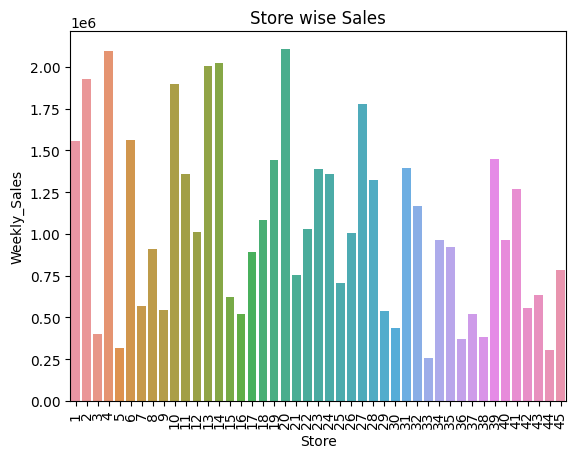

In [109]:
sns.barplot(y='Weekly_Sales',x='Store',data=wal2,ci=None)
plt.xticks(rotation=90)
plt.title('Store wise Sales')

In [2]:
#weekly sales high for store 4 and 20

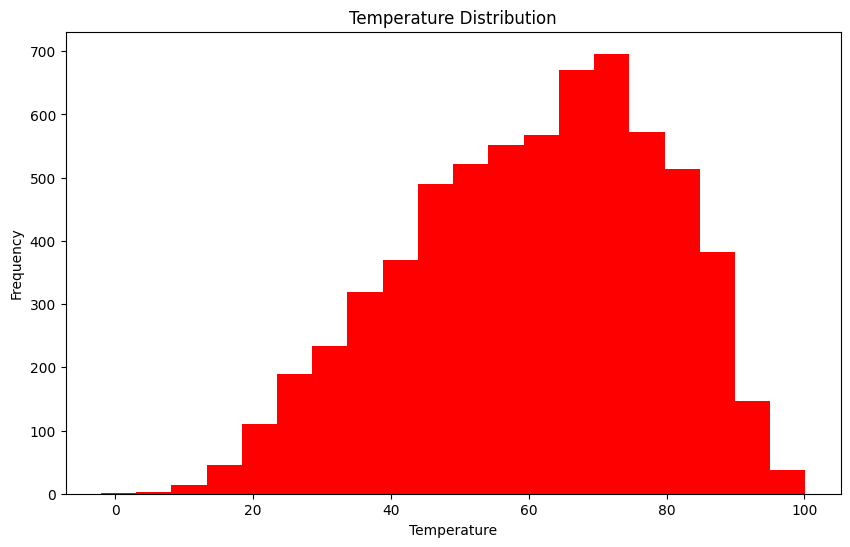

In [123]:
wal2['Temperature'].plot(kind='hist', bins=20, figsize=(10, 6),color='r')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# temperature frequency distribution

In [1]:
#How does the temperature affect weekly sales for the store?

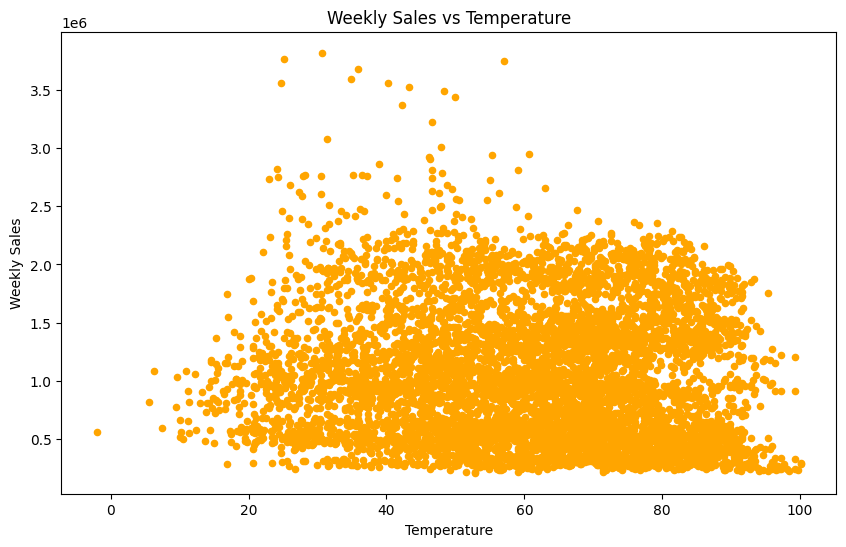

In [126]:
wal2.plot(kind='scatter', x='Temperature', y='Weekly_Sales', figsize=(10, 6),color='Orange')
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
#weekly sales high between 20 and 60 degree 

In [3]:
# Q3.Does the presence of a holiday significantly impact the weekly sales?

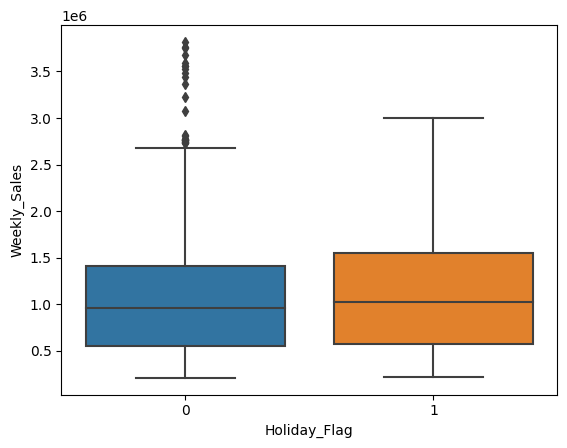

In [115]:
sns.boxplot(y='Weekly_Sales',x='Holiday_Flag',data=wal2)
plt.show()

In [3]:
# sales more during holidays

In [2]:
# Q2.Is there a correlation between fuel prices and weekly sales? How does it impact the sales?

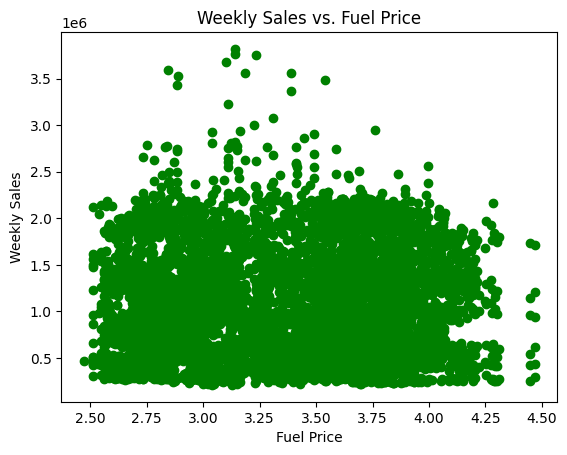

In [134]:
plt.scatter(wal2['Fuel_Price'], wal2['Weekly_Sales'],color='Green')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Fuel Price')
plt.show()

In [4]:
# weekly sales high for fuel prices between 3.00 to 3.50

In [4]:
# Q4.How does the Consumer Price Index (CPI) relate to the store's weekly sales?

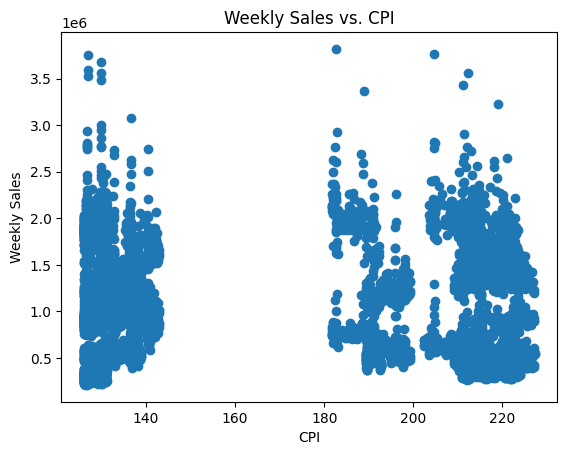

In [129]:
plt.scatter(wal2['CPI'], wal2['Weekly_Sales'])
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. CPI')
plt.show()

In [5]:
# weekly sales high only for CPI below 140  and above 180 .

In [5]:
# Q5.Is there a relationship between unemployment rates and the store's weekly sales?

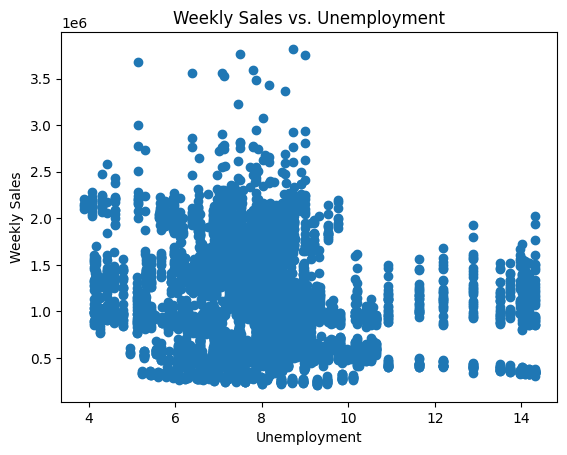

In [130]:
plt.scatter(wal2['Unemployment'], wal2['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Unemployment')
plt.show()

In [6]:
# for unemployment between 6 and 9 weekly sales seems high 

# Multivariate

In [27]:
wal2

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,18,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,39,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,19,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,50,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,42,10,2012


**Year 2010 , without holiday**

In [32]:
tas1 = wal2[(wal2['year']==2010)&(wal2['Holiday_Flag']==0)]
tas1 = tas1.reset_index(drop=True)

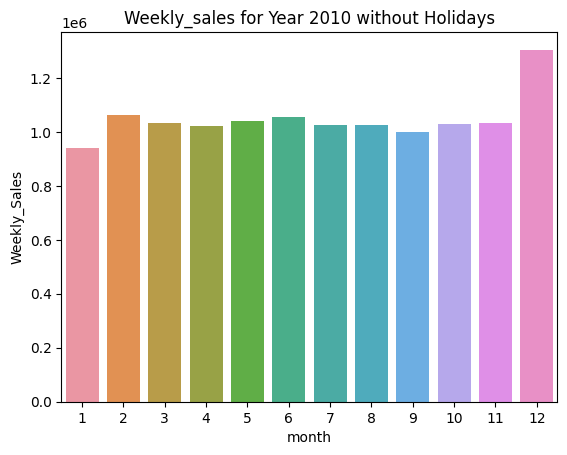

In [34]:
sns.barplot(y='Weekly_Sales',x='month',data=tas1,ci=None)
plt.title('Weekly_sales for Year 2010 without Holidays')
plt.show()


**Year 2010, with Holiday**

In [35]:
tas2 = wal2[(wal2['year']==2010)&(wal2['Holiday_Flag']==1)]
tas2 = tas2.reset_index(drop=True)

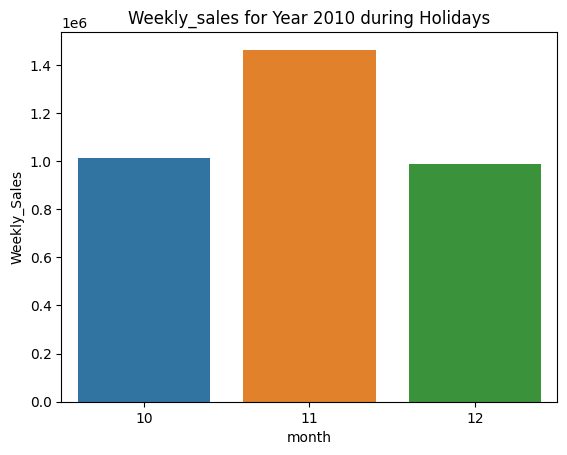

In [36]:
sns.barplot(y='Weekly_Sales',x='month',data=tas2,ci=None)
plt.title('Weekly_sales for Year 2010 during Holidays')
plt.show()

**Year 2011, without Holidays**

In [37]:
tas3 = wal2[(wal2['year']==2011)&(wal2['Holiday_Flag']==0)]
tas3 = tas3.reset_index(drop=True)

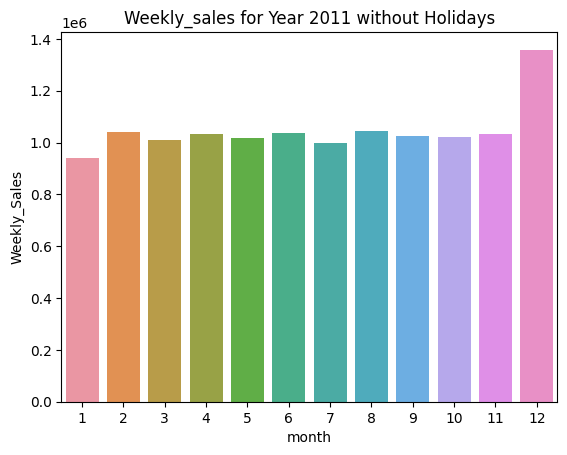

In [38]:
sns.barplot(y='Weekly_Sales',x='month',data=tas3,ci=None)
plt.title('Weekly_sales for Year 2011 without Holidays')
plt.show()

**Year 2011, during Holidays**

In [39]:
tas4 = wal2[(wal2['year']==2011)&(wal2['Holiday_Flag']==1)]
tas4 = tas4.reset_index(drop=True)

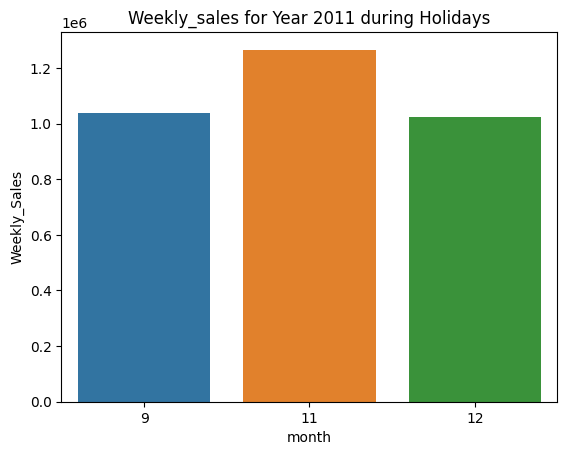

In [40]:
sns.barplot(y='Weekly_Sales',x='month',data=tas4,ci=None)
plt.title('Weekly_sales for Year 2011 during Holidays')
plt.show()

**Year 2012, without Holidays**

In [41]:
tas5 = wal2[(wal2['year']==2012)&(wal2['Holiday_Flag']==0)]
tas5 = tas5.reset_index(drop=True)

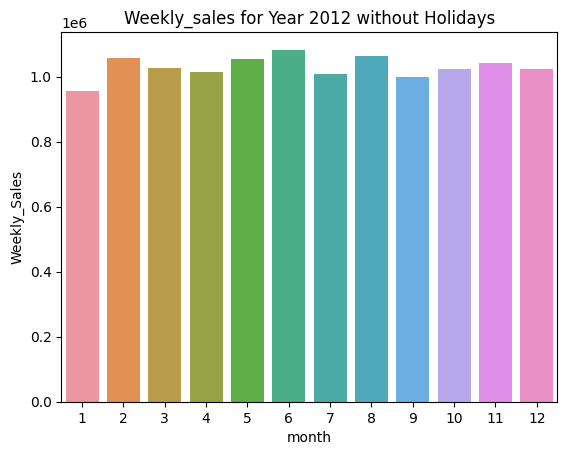

In [42]:
sns.barplot(y='Weekly_Sales',x='month',data=tas5,ci=None)
plt.title('Weekly_sales for Year 2012 without Holidays')
plt.show()

**Year 2012, during Holidays**

In [43]:
tas6 = wal2[(wal2['year']==2012)&(wal2['Holiday_Flag']==1)]
tas6 = tas6.reset_index(drop=True)

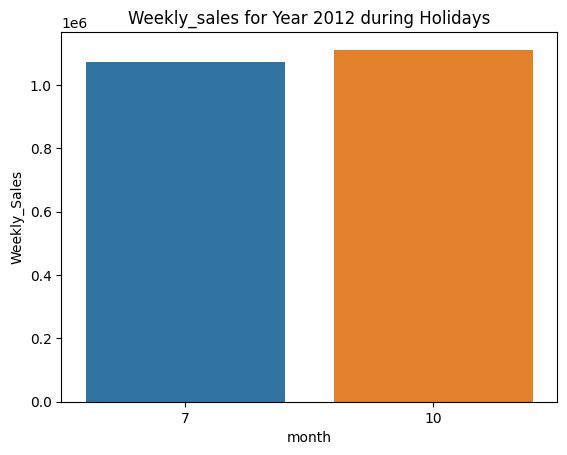

In [44]:
sns.barplot(y='Weekly_Sales',x='month',data=tas6,ci=None)
plt.title('Weekly_sales for Year 2012 during Holidays')
plt.show()

In [8]:
#saving the data in a file 

In [136]:
wal2.to_csv('walstore.csv', index=False)

In [9]:
# creating a correleation matrix

In [30]:
corr_mat1 = waldf.corr()
corr_mat1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,week,month,year
Store,1.000000e+00,-0.331487,-4.386841e-16,-0.023493,0.060023,-0.209492,0.304746,1.038488e-15,6.289676e-16,3.474318e-12
Weekly_Sales,-3.314868e-01,1.000000,2.455618e-02,-0.044075,0.018476,-0.069211,-0.072287,3.501767e-02,3.752959e-02,-4.880261e-03
Holiday_Flag,-4.386841e-16,0.024556,1.000000e+00,-0.155857,-0.078347,-0.002162,0.009050,3.288032e-01,3.322341e-01,-5.678257e-02
Temperature,-2.349285e-02,-0.044075,-1.558571e-01,1.000000,0.144291,0.176561,0.031358,7.213236e-02,6.546342e-02,6.448155e-02
Fuel_Price,6.002295e-02,0.018476,-7.834652e-02,0.144291,1.000000,-0.170642,-0.087369,-4.193804e-02,-5.283174e-02,7.794703e-01
CPI,-2.094919e-01,-0.069211,-2.162091e-03,0.176561,-0.170642,1.000000,-0.230330,2.782979e-03,1.478843e-03,7.479573e-02
Unemployment,3.047455e-01,-0.072287,9.049889e-03,0.031358,-0.087369,-0.230330,1.000000,-2.190682e-03,1.305209e-03,-2.276190e-01
week,1.038488e-15,0.035018,3.288032e-01,0.072132,-0.041938,0.002783,-0.002191,1.000000e+00,9.964777e-01,-1.269874e-01
month,6.289676e-16,0.037530,3.322341e-01,0.065463,-0.052832,0.001479,0.001305,9.964777e-01,1.000000e+00,-1.390145e-01
year,3.474318e-12,-0.004880,-5.678257e-02,0.064482,0.779470,0.074796,-0.227619,-1.269874e-01,-1.390145e-01,1.000000e+00


<Axes: >

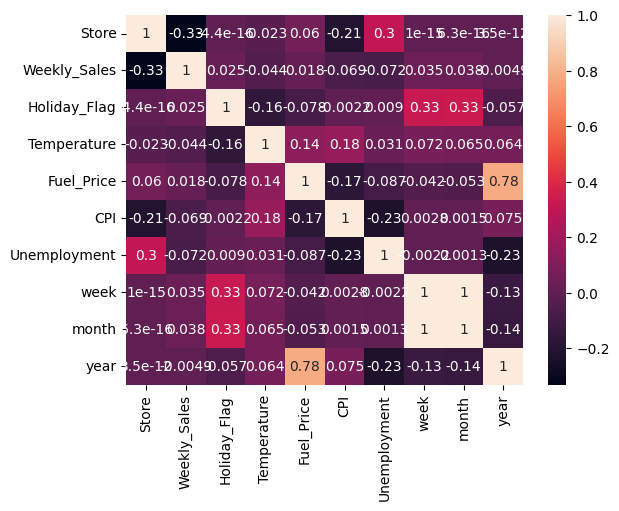

In [31]:
#heatmap correlation
sns.heatmap(corr_mat1,annot=True)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [33]:
#creating the splits
X=waldf.drop(['Weekly_Sales'],axis=1)
y=waldf['Weekly_Sales']

In [34]:
#datascaling
scaled_X = StandardScaler().fit_transform(X)
scaled_X

array([[-1.69397911, -0.27420425, -0.99890591, ..., -1.47352983,
        -1.37352517, -1.21089907],
       [-1.69397911,  3.64691651, -1.20540943, ..., -1.40274892,
        -1.37352517, -1.21089907],
       [-1.69397911, -0.27420425, -1.12824232, ..., -1.33196801,
        -1.37352517, -1.21089907],
       ...,
       [ 1.69397911, -0.27420425, -0.33809464, ...,  1.07458289,
         1.09709243,  1.29864538],
       [ 1.69397911, -0.27420425, -0.22940858, ...,  1.1453638 ,
         1.09709243,  1.29864538],
       [ 1.69397911, -0.27420425, -0.10007217, ...,  1.21614471,
         1.09709243,  1.29864538]])

In [35]:
#datasplitting
X_train, X_test,y_train, y_test=train_test_split(scaled_X,y,test_size=0.3,random_state=42)

In [36]:
X_train.shape

(4504, 9)

In [37]:
X_test.shape

(1931, 9)

# Linear Regression

In [38]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# creating the model and fitting it

In [39]:
lr_model = LinearRegression().fit(X_train,y_train)

In [40]:
#prediction
y_pred = lr_model.predict(X_test)

In [41]:
#model evaluation
print("rmse :", mean_squared_error(y_test,y_pred,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :", mean_squared_error(y_test,y_pred))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred))
print("r2q: " , r2_score(y_test,y_pred))

rmse : 506180.2660349124
mae : 426292.2236018619
mse : 256218461723.17468
MAP: 0.6032447395099155
r2q:  0.14759825479719568


In [42]:
#model score on training data
lr_model.score(X_train,y_train)

0.12914287896643473

In [43]:
#mdel score on test data
lr_model.score(X_test,y_test)

0.14759825479719568

# KNN

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [47]:
#creating folds
kf=KFold(n_splits=5,random_state=42,shuffle=True)

In [48]:
#calculating cross validation scores using r2  for knn on for different values of k and comparing the least score  
score1=[]
for i in range(20,40):
    score=cross_val_score(KNeighborsRegressor(i),X,y,cv=kf,scoring='r2')
    print(f'{i} : ',np.mean(score))
    score1.append(np.mean(score))

20 :  0.42592026276968065
21 :  0.423002100950606
22 :  0.4193687081575721
23 :  0.41612500218829124
24 :  0.41228985981844846
25 :  0.40933494716280566
26 :  0.40719590345820167
27 :  0.404590592383473
28 :  0.4028118151268221
29 :  0.4002562950548925
30 :  0.39836201796558146
31 :  0.39539865620667014
32 :  0.39192206761299186
33 :  0.38853350301305917
34 :  0.38521096138390676
35 :  0.38193449851605565
36 :  0.37905050546170405
37 :  0.3751181659017434
38 :  0.37153343101490793
39 :  0.3689112927391606


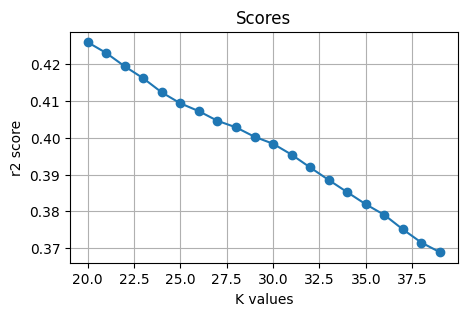

In [49]:
#plotting graph for each values of k
plt.figure(figsize=(5,3))
plt.plot(range(20,40),score1,marker='o')
plt.xlabel('K values')
plt.ylabel('r2 score')
plt.title("Scores")
plt.grid()
plt.show()

In [50]:
# for k 20, r2 is highest 
k=20
k_model = KNeighborsRegressor(k).fit(X_train,y_train)
y_predk = k_model.predict(X_test)

In [51]:
#score on train
print("Training score:", k_model.score(X_train,y_train))

Training score: 0.427012180002168


In [52]:
#score on test
print("Test score:", k_model.score(X_test,y_test))

Test score: 0.392714398677637


In [53]:
#model evaluation
print("rmse :", mean_squared_error(y_test,y_predk,squared=False))
print("mae :", mean_absolute_error(y_test,y_predk))
print("mse :", mean_squared_error(y_test,y_predk))
print("MAP:" , mean_absolute_percentage_error(y_test,y_predk))
print("r2q: " , r2_score(y_test,y_predk))

rmse : 427247.50643428223
mae : 348372.6694453651
mse : 182540431754.31204
MAP: 0.4650977961321414
r2q:  0.392714398677637


# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [55]:
#using girdsearch for cross validation
from sklearn.model_selection import GridSearchCV

In [56]:
dt=DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

In [57]:
# creating parametrs to use in the model 
param_grid={'min_samples_split':[3,5,7,9,10,40,80,100],
           'min_samples_leaf':[1,3,4,5,6,7,8,10,40,80,100],
           'max_depth':[3,4,5,6,7,8,9,10],
           'max_features':[2,3,4,5,6,7]}

In [58]:
#creating the model using gridsearch
gridcv=GridSearchCV(dt,param_grid,cv=kf)

In [59]:
gridcv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 3, 4, 5, 6, 7, 8, 10, 40, 80,
                                              100],
                         'min_samples_split': [3, 5, 7, 9, 10, 40, 80, 100]})

In [60]:
gridcv.best_score_

0.9101485622022869

In [61]:
# best parameters calculated
gridcv.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 3}

In [62]:
gridcv.best_estimator_

DecisionTreeRegressor(max_depth=10, max_features=7, min_samples_leaf=6,
                      min_samples_split=3, random_state=42)

In [63]:
dt_model=DecisionTreeRegressor(max_depth=10, max_features=7, min_samples_leaf=6,
                      min_samples_split=3, random_state=42).fit(X_train,y_train)
y_pred2=dt_model.predict(X_test)

In [64]:
#train and test score
print('Score Training: ',dt_model.score(X_train,y_train))
print('Score Test: ',dt_model.score(X_test,y_test))

Score Training:  0.9409493058182095
Score Test:  0.9068633830196138


In [65]:
#model evaluation
print("rmse :", mean_squared_error(y_test,y_pred2,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred2))
print("mse :", mean_squared_error(y_test,y_pred2))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred2))
print("r2q: " , r2_score(y_test,y_pred2))

rmse : 167318.2347754857
mae : 91187.34419517923
mse : 27995391688.384556
MAP: 0.08241041617439775
r2q:  0.9068633830196138


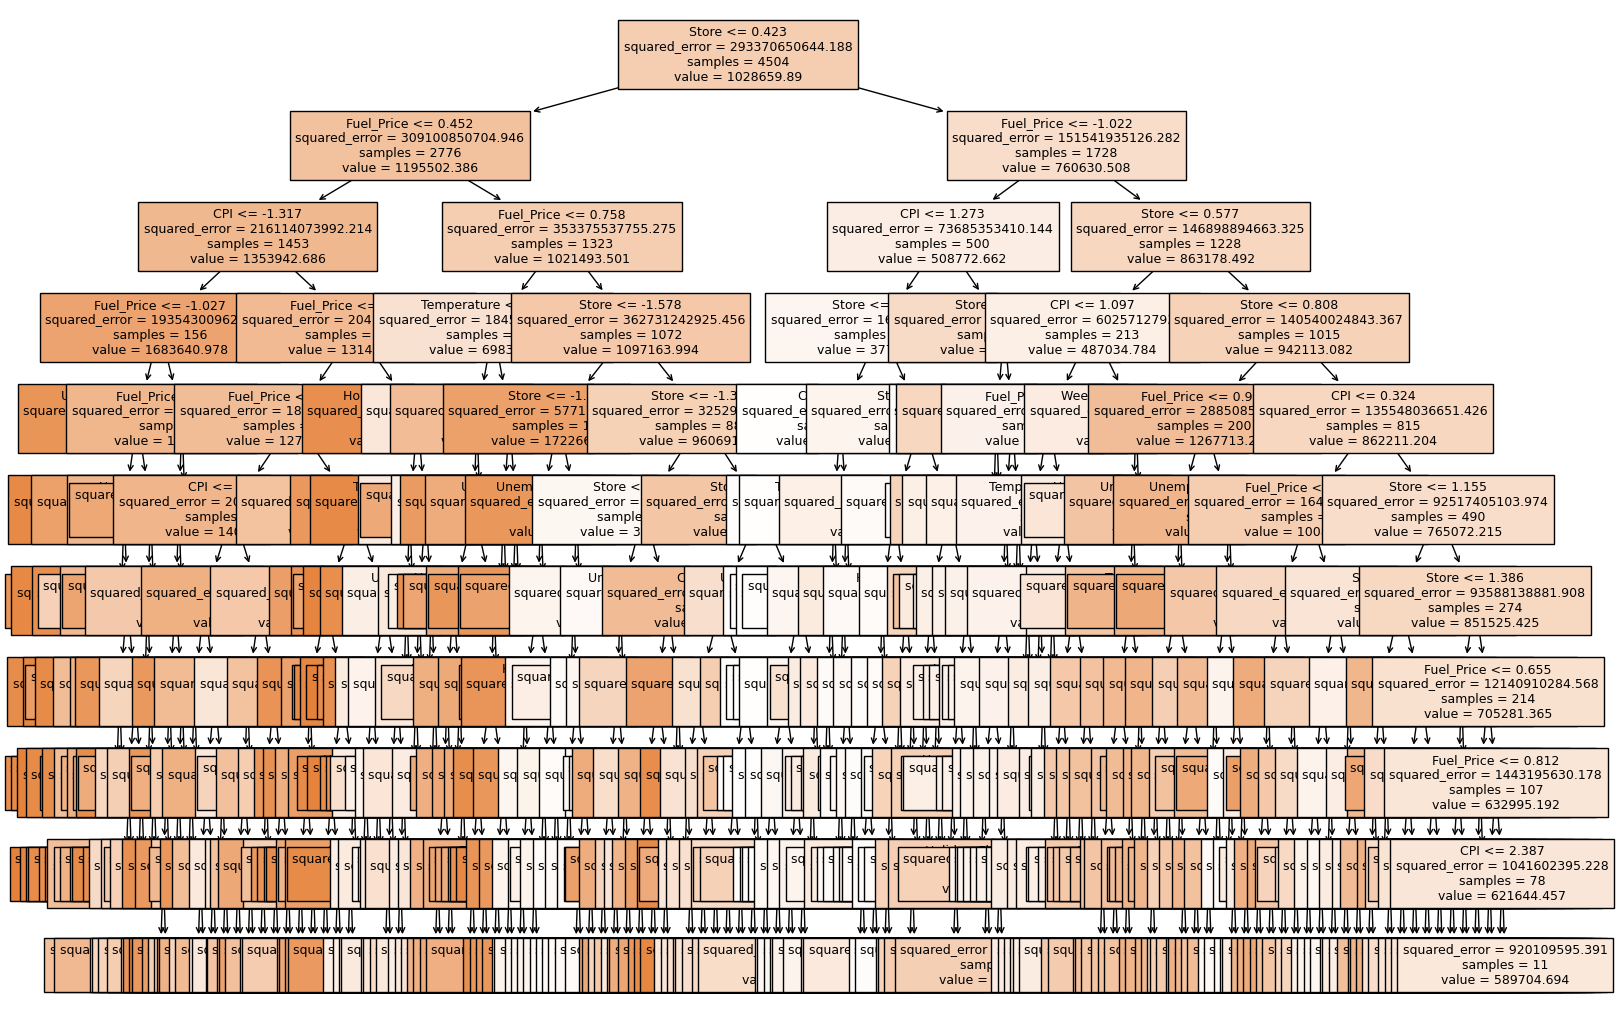

In [66]:
#decision tree model
plt.figure(figsize=(18,13))
tree.plot_tree(dt_model,filled=True,feature_names=waldf.columns,fontsize=9)
plt.show()

# Random Forest

In [67]:
#ensemble learning(bagging)
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf=RandomForestRegressor()

In [69]:
#parameters created
param_grid={"n_estimators":[10,20,40,50,70,100,150,200], #base learner
            "min_samples_split":[10,20,30], #sample size
            "min_samples_leaf":[20,40,100],
            "max_depth":[3,4,5,6,7,8,9,10]
}

In [70]:
grid_cv = GridSearchCV(rf,param_grid,cv=kf,scoring="r2")

In [71]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [10, 20, 40, 50, 70, 100, 150, 200]},
             scoring='r2')

In [72]:
grid_cv.best_score_

0.9084141151699032

In [73]:
#best parameters
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 30,
 'n_estimators': 40}

In [74]:
grid_cv.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=30,
                      n_estimators=40)

In [75]:
#model creation and fitting 
rm_model=RandomForestRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=30,n_estimators=40).fit(X_train,y_train)

y_pred3=rm_model.predict(X_test)

In [76]:
#evaluation
print("rmse :", mean_squared_error(y_test,y_pred3,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred3))
print("mse :", mean_squared_error(y_test,y_pred3))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred3))
print("r2q: " , r2_score(y_test,y_pred3))

rmse : 159658.1905435869
mae : 91446.02736190293
mse : 25490737807.6523
MAP: 0.09360264193351896
r2q:  0.9151960040364858


In [77]:
rm_model.score(X_test,y_test)

0.9151960040364858

In [78]:
rm_model.score(X_train,y_train)

0.9232764208141716

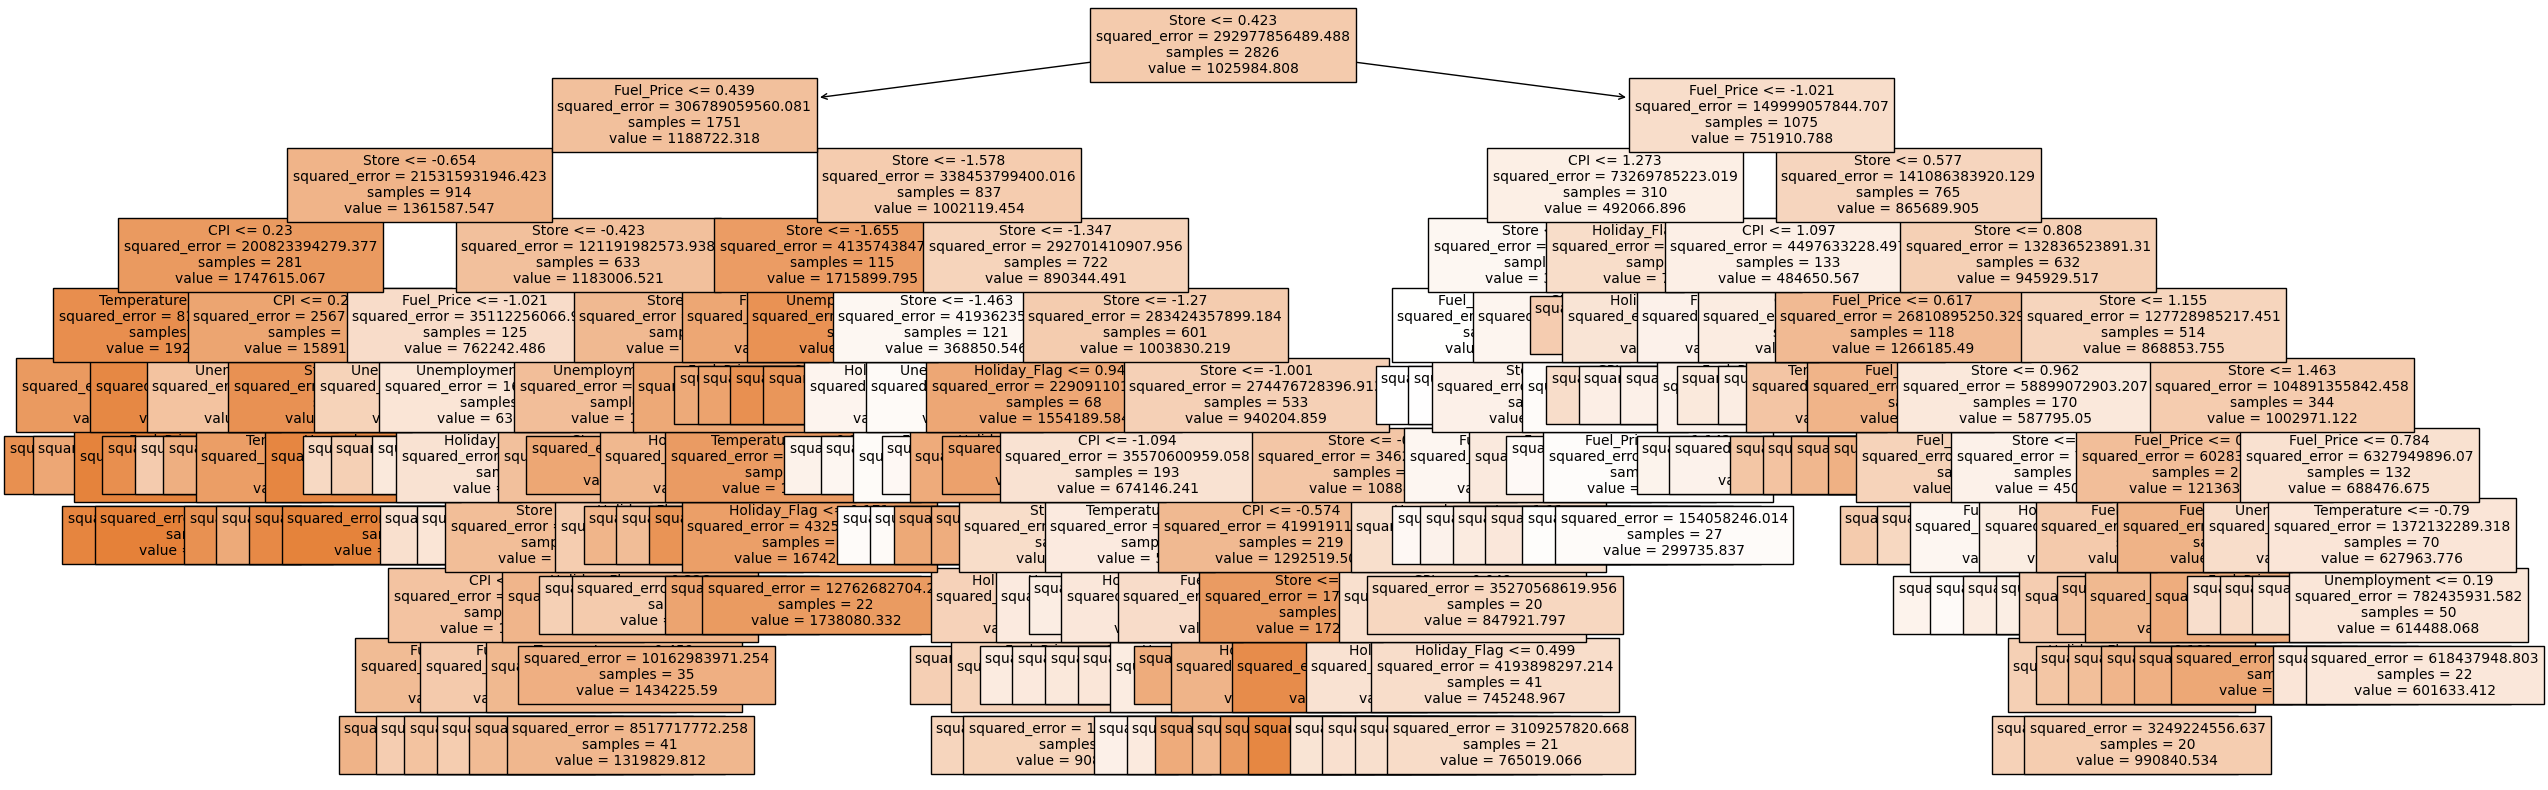

In [79]:
#random forest
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(grid_cv.best_estimator_[0],feature_names=waldf.columns,class_names=True,filled=True,fontsize=10)
plt.show()

# Stacking

In [81]:
#ensemble learning
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [82]:
#metamodel
level1=[]
level1.append(('lr',LinearRegression()))
level1.append(('KNN',KNeighborsRegressor()))
level1.append(('SVM',SVR()))
level1.append(('DT',DecisionTreeRegressor(max_depth=10, max_features=7, min_samples_leaf=6,
                      min_samples_split=3, random_state=42)))
level1.append(('RF',RandomForestRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=30,n_estimators=40)))
level2=LinearRegression()
stac_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [83]:
level1

[('lr', LinearRegression()),
 ('KNN', KNeighborsRegressor()),
 ('SVM', SVR()),
 ('DT',
  DecisionTreeRegressor(max_depth=10, max_features=7, min_samples_leaf=6,
                        min_samples_split=3, random_state=42)),
 ('RF',
  RandomForestRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=30,
                        n_estimators=40))]

In [84]:
#model creation
s_model=stac_model.fit(X_train,y_train)
y_pred6=s_model.predict(X_test)

In [85]:
#score on train and test
print('Score Training: ',s_model.score(X_train,y_train))
print('Score Test: ',s_model.score(X_test,y_test))

Score Training:  0.9438391459065926
Score Test:  0.9255819447570905


In [86]:
#model evaluation
print("rmse :", mean_squared_error(y_test,y_pred6,squared=False))
print("mae :", mean_absolute_error(y_test,y_pred6))
print("mse :", mean_squared_error(y_test,y_pred6))
print("MAP:" , mean_absolute_percentage_error(y_test,y_pred6))
print("r2q: " , r2_score(y_test,y_pred6))

rmse : 149562.32329897894
mae : 85813.31848373014
mse : 22368888550.588303
MAP: 0.08255166113406959
r2q:  0.9255819447570905


**Based on rsquare score Stacking performs the best**